# Validation against Buckley et al. 2007

This notebook compares metaSIPSim simulation results against those of Buckley et al. 2007. Comparisons are made to figure 2 from said paper.

For the simulation, I will be generating fragments only. I will estimate the amount of DNA from each genome in each fraction by multiplying fragment size by simulated abundance then summing within each genome.

Buckley DH, Huangyutitham V, Hsu SF, Nelson TA (2007) Stable Isotope Probing with 15N Achieved by Disentangling the Effects of Genome G+C Content and Isotope Enrichment on DNA Density. Applied and Environmental Microbiology. 73:3189-3195 DOI:10.1128/AEM.02609-06

## Intitiation

In [1]:
import os
import pandas as pd
import ConfigParser
import rpy2.ipython

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(dplyr)
library(ggplot2)

/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


In [4]:
# What is your working directory?
workdir = '/home/sam/data/SIPSim2_data/dev/validation/Buckley2007/'

# Where are your genomes?
genomedir = '/home/sam/data/SIPSim2_data/dev/validation/Buckley2007/genomes/'



In [5]:
# making directories
## working directory
if not os.path.isdir(workdir):
    os.makedirs(workdir)
%cd $workdir

## genome directory
if not os.path.isdir(genomedir):
    os.makedirs(genomedir)
print(genomedir)

/home/sam/data/SIPSim2_data/dev/validation/Buckley2007
/home/sam/data/SIPSim2_data/dev/validation/Buckley2007/genomes/


## Part 1: Get genomes

In [6]:
%cd $genomedir
# The genomes you want are:
## Escherichia_coli_K12: GCA_000005845.2
## Pseudomonas_aeruginosa_PAO1: GCA_000006765.1

!wget -O Escherichia_coli_K12.fna.gz ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz
!wget -O Pseudomonas_aeruginosa_PAO1.fna.gz ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/006/765/GCF_000006765.1_ASM676v1/GCF_000006765.1_ASM676v1_genomic.fna.gz
!gunzip Escherichia_coli_K12.fna.gz
!gunzip Pseudomonas_aeruginosa_PAO1.fna.gz

/home/sam/data/SIPSim2_data/dev/validation/Buckley2007/genomes
--2019-05-20 16:01:14--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz
           => ‘Escherichia_coli_K12.fna.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 2607:f220:41e:250::12
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2 ... done.
==> SIZE GCF_000005845.2_ASM584v2_genomic.fna.gz ... 1379902
==> PASV ... done.    ==> RETR GCF_000005845.2_ASM584v2_genomic.fna.gz ... done.
Length: 1379902 (1.3M) (unauthoritative)

GCF_000005845.2_ASM 100%[===================>]   1.32M  --.-KB/s    in 0.1s    

2019-05-20 16:01:14 (12.6 MB/s) - ‘Escherichia_coli_K12.fna.gz’ saved [1379902]

--2019-05-20 16:01:14--  ftp://ftp.ncbi.nlm

## Part 2: Simulation

### A) Get genome indexes

In [7]:
%cd $workdir

/home/sam/data/SIPSim2_data/dev/validation/Buckley2007


In [8]:
# make index file of genomes 
!ls $genomedir | grep ".fna" > genome_files.txt
!tail genome_files.txt

Escherichia_coli_K12.fna
Pseudomonas_aeruginosa_PAO1.fna


In [9]:
with open("genome_files.txt", 'r') as genome_files, open ("genome_index.txt", 'w') as genome_index:
    genomes = genome_files.readlines()
    for line in genomes:
        fasta = line
        taxa = fasta.replace('.fna\n', '\t')
        genome_index.write(taxa + fasta)
!cat genome_index.txt

Escherichia_coli_K12	Escherichia_coli_K12.fna
Pseudomonas_aeruginosa_PAO1	Pseudomonas_aeruginosa_PAO1.fna


### B) Set up experimental design

#### List of incorporators
Onlu E. coli K12 in library 3 is 15N enriched

In [10]:
library = [3]

taxon_name = ['Escherichia_coli_K12'] 

percent_incorporation = [100.0]

sd_incorporation = [0]

incorporators = pd.DataFrame({'taxon_name':taxon_name, 'library':library, 
                       'percent_incorporation':percent_incorporation, 'sd_incorporation':sd_incorporation})
incorporators = incorporators.reindex(columns = ['taxon_name', 'library', 'percent_incorporation', 'sd_incorporation'])
incorporators.to_csv("incorporators.txt", sep='\t', index=False)

!cat incorporators.txt

taxon_name	library	percent_incorporation	sd_incorporation
Escherichia_coli_K12	3	100.0	0


#### Community composition file
What are the relative abundances of your community members

In [11]:
library = [1, 2, 3]

taxon_name = ['Pseudomonas_aeruginosa_PAO1', 'Escherichia_coli_K12', 'Escherichia_coli_K12'] 

rel_abund_perc = [100.0, 100.0, 100.0]

rank = [1,1,1]

comm = pd.DataFrame({'library':library, 'taxon_name':taxon_name, 
                       'rel_abund_perc':rel_abund_perc, 'rank':rank})
comm = comm.reindex(columns = ['library', 'taxon_name', 'rel_abund_perc', 'rank'])
comm.to_csv("comm.txt", sep='\t', index=False)

!cat comm.txt

library	taxon_name	rel_abund_perc	rank
1	Pseudomonas_aeruginosa_PAO1	100.0	1
2	Escherichia_coli_K12	100.0	1
3	Escherichia_coli_K12	100.0	1


#### Generate fraction file

Fractions used in this simulation are estimates based on the figure in the paper.

In [13]:
%%R
fractions = read.table('/home/sam/data/SIPSim2_data/dev/validation/figure_estimates.txt', 
                          header=TRUE, sep="\t") %>%
    filter(Study == "Buckley2007") %>%
    mutate(BD = round(BD, digits=3)) %>%
    select(library, BD, fraction) %>%
    group_by(library) %>%
    mutate(last_frac = max(fraction)) %>%
    ungroup()
for (i in 1:nrow(fractions)){
    fractions$BD_prev[i] = fractions$BD[i-1]
    fractions$BD_next[i] = fractions$BD[i+1]
    if (fractions$fraction[i] == 1){
        fractions$BD_prev[i] = (2*fractions$BD[i])-fractions$BD_next[i]
    }
    if (fractions$fraction[i] == fractions$last_frac[i]){
        fractions$BD_next[i] = (2*fractions$BD[i])-fractions$BD_prev[i]
    }
}
fractions = fractions %>%
    mutate(BD_min = (BD+BD_prev)/2, BD_max = (BD+BD_next)/2) %>%
    mutate(fraction_size = round(BD_max-BD_min, 4)) %>%
    select(library, fraction, BD_min, BD_max, fraction_size)
write.table(fractions, "fracs.txt", quote=F, sep="\t", row.names=F)

In [14]:
!cat fracs.txt

library	fraction	BD_min	BD_max	fraction_size
2	1	1.68	1.684	0.004
2	2	1.684	1.688	0.004
2	3	1.688	1.692	0.004
2	4	1.692	1.696	0.004
2	5	1.696	1.7	0.004
2	6	1.7	1.704	0.004
2	7	1.704	1.708	0.004
2	8	1.708	1.7115	0.0035
2	9	1.7115	1.715	0.0035
2	10	1.715	1.719	0.004
2	11	1.719	1.723	0.004
2	12	1.723	1.727	0.004
2	13	1.727	1.731	0.004
2	14	1.731	1.735	0.004
2	15	1.735	1.739	0.004
2	16	1.739	1.743	0.004
2	17	1.743	1.747	0.004
2	18	1.747	1.751	0.004
3	1	1.68	1.684	0.004
3	2	1.684	1.6875	0.0035
3	3	1.6875	1.691	0.0035
3	4	1.691	1.695	0.004
3	5	1.695	1.6985	0.0035
3	6	1.6985	1.702	0.0035
3	7	1.702	1.706	0.004
3	8	1.706	1.71	0.004
3	9	1.71	1.714	0.004
3	10	1.714	1.7175	0.0035
3	11	1.7175	1.721	0.0035
3	12	1.721	1.725	0.004
3	13	1.725	1.729	0.004
3	14	1.729	1.733	0.004
3	15	1.733	1.737	0.004
3	16	1.737	1.7405	0.0035
3	17	1.7405	1.744	0.0035
3	18	1.744	1.748	0.004
1	1	1.679	1.683	0.004
1	2	1.683	1.687	0.004
1	3	1.687	1.691	0.004
1	4	1.691	1.6945	0.0035
1	5	1.6945	1.698	0.0035
1	6	1.698	1.702	0.0

### C) Make configuration file for simulation
This configuration file contains all the information needed for simulation. Experimental parameters are based on the methods of the paper.

In [15]:
config = ConfigParser.SafeConfigParser()

## Other parameters
config.add_section('Other')
config.set('Other', 'temp_directory', './tmp')
config.set('Other', 'threads', '1')
config.set('Other', 'logfile', 'SIPSim2_Buckley.log')
config.set('Other', 'endpoint', 'fragment_list')

## Library parameters
config.add_section('Library')
config.set('Library', 'library_list', '1, 2, 3')
config.set('Library', 'window_or_fraction', 'fraction')

## Fragment parameters
config.add_section('Fragment')
config.set('Fragment', 'genome_index_file', 'genome_index.txt')
config.set('Fragment', 'genomeDir', genomedir)
config.set('Fragment', 'frag_length_distribution', 'skewed-normal,9000,2500,-5')
config.set('Fragment', 'coverage_of_fragments', '100')
config.set('Fragment', 'fragment_file', 'frags.txt')
config.set('Fragment', 'temp_fragment_file', 'tmp.frags')
config.set('Fragment', 'number_of_iterations', '1')

## Gradient parameters
config.add_section('Gradient')
config.set('Gradient', 'temperature', '293.15')
config.set('Gradient', 'avg_density', '1.69')
config.set('Gradient', 'angular_velocity', '33172837')
config.set('Gradient', 'min_rotation_radius', '2.6')
config.set('Gradient', 'max_rotation_radius', '4.85')
config.set('Gradient', 'tube_angle', '28.6')
config.set('Gradient', 'tube_radius', '0.66')
config.set('Gradient', 'tube_height', '4.7')
config.set('Gradient', 'fraction_frag_in_DBL', '0.001')
config.set('Gradient', 'isotope', 'N')

## Model parameters
config.add_section('Model')
config.set('Model', 'min_bouyant_density', '1.67')
config.set('Model', 'max_bouyant_density', '1.775')
config.set('Model', 'bouyant_density_step', '0.0001')
config.set('Model', 'fraction_table_file', 'fracs.txt')

## Community parameters
config.add_section('Community')
config.set('Community', 'community_file', 'comm.txt')
config.set('Community', 'incorporator_file', 'incorporators.txt')

## Sequencing parameters
config.add_section('Sequencing')
config.set('Sequencing', 'number_of_genomes_per_iteration', '1')


# Writing our configuration file to 'example.cfg'
with open('simulation_parameters.cfg', 'wb') as configfile:
    config.write(configfile)

### D) Simulate fragments for each fraction
Use the function SIPSim2_get_fragment_list_fractions.py to get the fragments for each genome in each fraction of every library

In [16]:
!python /home/sam/notebooks/SIPSim_metagenome/bin/SIPSim_metagenome.py simulation_parameters.cfg

Running SIPSim_metagenome
This program was writen by Samuel Barnett (seb369@cornell.edu)

This run was started on 20/05/19 at 16:01:42


You have chosen to get an list of simulated SIP metagenome fragments with adjusted buoyant densities.
You have selected to simulate metagenome sequences for each fraction.

Your community abundance file is: comm.txt

Your incorporator assignment file is: incorporators.txt

You are simulating with the isotope of N

It took 0.874 seconds to get these models.
It took 0.94 seconds to get these models.
It took 0.797 seconds to get these models.

Building fragments

It took 56.79 seconds to build the fragments

----------

Starting library 1

Starting library 1 fraction 1 BD:1.679-1.683
Writing fragments to file
It took 35.403 seconds to write fragment file.
It took 35.404 seconds to run library 1 fraction BD:1.679-1.683 iteration 1

It took 35.404 seconds to run the library 1 fraction 1 BD:1.679-1.683

Starting library 1 fraction 2 BD:1.683-1.687
Writing f

Writing fragments to file
It took 26.03 seconds to write fragment file.
It took 284.638 seconds to run library 2 fraction BD:1.719-1.723 iteration 1

It took 26.031 seconds to run the library 2 fraction 11 BD:1.719-1.723

Starting library 2 fraction 12 BD:1.723-1.727
Writing fragments to file
It took 26.347 seconds to write fragment file.
It took 310.986 seconds to run library 2 fraction BD:1.723-1.727 iteration 1

It took 26.348 seconds to run the library 2 fraction 12 BD:1.723-1.727

Starting library 2 fraction 13 BD:1.727-1.731
Writing fragments to file
It took 26.072 seconds to write fragment file.
It took 337.059 seconds to run library 2 fraction BD:1.727-1.731 iteration 1

It took 26.073 seconds to run the library 2 fraction 13 BD:1.727-1.731

Starting library 2 fraction 14 BD:1.731-1.735
Writing fragments to file
It took 26.065 seconds to write fragment file.
It took 363.124 seconds to run library 2 fraction BD:1.731-1.735 iteration 1

It took 26.066 seconds to run the library 2

## Part 3: Original SIPSim simulation

To test this program with other simulations I'll run the same analysis with SIPSim

In [38]:
%cd $workdir

/home/sam/data/SIPSim2_data/dev/validation/Buckley2007


Modify the comm.txt file so that you include both genomes

In [113]:
%%bash
echo -e "library\ttaxon_name\trel_abund_perc\trank" > comm2.txt
echo -e "1\tPseudomonas_aeruginosa_PAO1\t100.0\t2\n1\tEscherichia_coli_K12\t0.0\t1" >> comm2.txt
echo -e "2\tPseudomonas_aeruginosa_PAO1\t0.0\t2\n2\tEscherichia_coli_K12\t100.0\t1" >> comm2.txt
echo -e "3\tPseudomonas_aeruginosa_PAO1\t0.0\t2\n3\tEscherichia_coli_K12\t100.0\t1" >> comm2.txt

cat comm2.txt

library	taxon_name	rel_abund_perc	rank
1	Pseudomonas_aeruginosa_PAO1	100.0	2
1	Escherichia_coli_K12	0.0	1
2	Pseudomonas_aeruginosa_PAO1	0.0	2
2	Escherichia_coli_K12	100.0	1
3	Pseudomonas_aeruginosa_PAO1	0.0	2
3	Escherichia_coli_K12	100.0	1


### 1) Get fragments

In [114]:
!SIPSim fragments \
    genome_index.txt \
    --fp $genomedir/ \
    --fld skewed-normal,9000,2500,-5 \
    --flr None,None \
    --nf 100X \
    --tbl \
    --np 15 \
    2> Buckley_SIPsim.log \
    > Buckley_SIPsim.txt
!cat Buckley_SIPsim.log

DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
Processing: "Escherichia_coli_K12"
Processing: "Pseudomonas_aeruginosa_PAO1"
  Genome name: Escherichia_coli_K12
  Genome length (bp): 4641652
  Number of amplicons: None
  Number of fragments simulated: 65987
  Genome name: Pseudomonas_aeruginosa_PAO1
  Genome length (bp): 6264404
  Number of amplicons: None
  Number of fragments simulated: 88988


### 2) Convert to 2d-KDE format

In [115]:
!SIPSim fragment_KDE \
    Buckley_SIPsim.txt \
    > Buckley_SIPsim_kde.pkl
    
!ls -thlc Buckley_SIPsim_kde.pkl

DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
-rw-rw-r-- 1 sam sam 2.4M May 20 18:17 Buckley_SIPsim_kde.pkl


### 3) Add diffusion

In [116]:
!SIPSim diffusion \
    Buckley_SIPsim_kde.pkl \
    --np 15 \
    > Buckley_SIPsim_kde_dif.pkl

!ls -thlc Buckley_SIPsim_kde_dif.pkl

DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
Index size: 90508
Processing: Escherichia_coli_K12
Processing: Pseudomonas_aeruginosa_PAO1
-rw-rw-r-- 1 sam sam 7.7M May 20 18:17 Buckley_SIPsim_kde_dif.pkl


### 4) Add diffusive boundery layer

In [117]:
!SIPSim DBL \
    Buckley_SIPsim_kde_dif.pkl \
    --np 20 \
    -D 1.69 \
    -w 33172837 \
    --tube_height 4.7 \
    --r_min 2.6 \
    --r_max 4.85 \
    > Buckley_SIPsim_kde_dif_DBL.pkl


!ls -thlc Buckley_SIPsim_kde_dif_DBL.pkl

DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
DBL_index file written: "DBL_index.txt"
Processing: Escherichia_coli_K12
Processing: Pseudomonas_aeruginosa_PAO1
-rw-rw-r-- 1 sam sam 7.7M May 20 18:17 Buckley_SIPsim_kde_dif_DBL.pkl


### 5) Add isotope incorporation

In [118]:
!cat incorporators.txt

taxon_name	library	percent_incorporation	sd_incorporation
Escherichia_coli_K12	3	100.0	0


In [119]:
%%bash
SIPSim incorp_config_example \
  --percTaxa 100 \
  --percIncorpMean 100 \
  --percIncorpSD 0 \
  --n_reps 1 \
  > incorp.config

cat incorp.config


[1]
    # baseline: no incorporation
    treatment = control
    
    [[intraPopDist 1]]
        distribution = uniform
        
        [[[start]]]
            
            [[[[interPopDist 1]]]]
                distribution = uniform
                start = 0
                end = 0
        
        [[[end]]]
            
            [[[[interPopDist 1]]]]
                distribution = uniform
                start = 0
                end = 0
[2]
    # 'treatment' community: possible incorporation
    treatment = labeled
    max_perc_taxa_incorp = 100
    
    [[intraPopDist 1]]
        distribution = normal
        [[[mu]]]
            [[[[interPopDist 1]]]]
                start = 100
                distribution = uniform
                end = 100
        [[[sigma]]]
            [[[[interPopDist 1]]]]
                start = 0
                distribution = uniform
                end = 0
    


DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2


In [120]:
%%bash
sed -e 's/\[2\]/[3]/g' incorp.config | sed -e '/\[1\]/,+19d' >> incorp.config

cat incorp.config



[1]
    # baseline: no incorporation
    treatment = control
    
    [[intraPopDist 1]]
        distribution = uniform
        
        [[[start]]]
            
            [[[[interPopDist 1]]]]
                distribution = uniform
                start = 0
                end = 0
        
        [[[end]]]
            
            [[[[interPopDist 1]]]]
                distribution = uniform
                start = 0
                end = 0
[2]
    # 'treatment' community: possible incorporation
    treatment = labeled
    max_perc_taxa_incorp = 100
    
    [[intraPopDist 1]]
        distribution = normal
        [[[mu]]]
            [[[[interPopDist 1]]]]
                start = 100
                distribution = uniform
                end = 100
        [[[sigma]]]
            [[[[interPopDist 1]]]]
                start = 0
                distribution = uniform
                end = 0
    

[3]
    # 'treatment' community: possible incorporation
    treatment = labeled
    m

Make file identifying incorporators for each library

In [122]:
%%bash
echo -e "1\n2\n3\tEscherichia_coli_K12" > incorp_taxa.txt

cat incorp_taxa.txt


1
2
3	Escherichia_coli_K12


Add isoptope incorporation

In [123]:
!SIPSim isotope_incorp \
    --comm comm2.txt \
    --taxa incorp_taxa.txt \
    --isotope 15N \
    --np 15 \
    Buckley_SIPsim_kde_dif_DBL.pkl \
    incorp.config \
    > Buckley_SIPsim_kde_dif_DBL_inc.pkl
    
!ls -thlc Buckley_SIPsim_kde_dif_DBL_inc.pkl 


DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
Loading KDE object...
Processing library: 1
Processing: Escherichia_coli_K12
Processing: Pseudomonas_aeruginosa_PAO1
Processing library: 2
Processing: Escherichia_coli_K12
Processing: Pseudomonas_aeruginosa_PAO1
Processing library: 3
Processing: Escherichia_coli_K12
Processing: Pseudomonas_aeruginosa_PAO1
File written: BD-shift_stats.txt
-rw-rw-r-- 1 sam sam 23M May 20 18:18 Buckley_SIPsim_kde_dif_DBL_inc.pkl


### 6) Making OTU table


In [126]:
!SIPSim OTU_table \
    --np 1 \
    --abs 1e5 \
    Buckley_SIPsim_kde_dif_DBL_inc.pkl \
    comm2.txt \
    fracs.txt \
    > Buckley_SIPsim_OTU.txt
    
!head Buckley_SIPsim_OTU.txt

DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
Loading files...
Simulating OTUs...
Processing library: "1"
  Processing taxon: "Pseudomonas_aeruginosa_PAO1"
   taxon abs-abundance:  100000
  Processing taxon: "Escherichia_coli_K12"
   taxon abs-abundance:  0
Processing library: "2"
  Processing taxon: "Pseudomonas_aeruginosa_PAO1"
   taxon abs-abundance:  0
  Processing taxon: "Escherichia_coli_K12"
   taxon abs-abundance:  100000
Processing library: "3"
  Processing taxon: "Pseudomonas_aeruginosa_PAO1"
   taxon abs-abundance:  0
  Processing taxon: "Escherichia_coli_K12"
   taxon abs-abundance:  100000
library	taxon	fraction	BD_min	BD_mid	BD_max	count	rel_abund
1	Escherichia_coli_K12	-inf-1.679	-inf	1.678	1.678	0	0
1	Escherichia_coli_K12	1.679-1.683	1.679	1.681	1.683	0	0
1	Escherichia_coli_K12	1.683-1.687	1.683	1.685	1.687	0	0
1	Escherichia_coli_K12	1.687-1.691	1.687	1.689	1.691	

In [127]:
!cat Buckley_SIPsim_OTU.txt

library	taxon	fraction	BD_min	BD_mid	BD_max	count	rel_abund
1	Escherichia_coli_K12	-inf-1.679	-inf	1.678	1.678	0	0
1	Escherichia_coli_K12	1.679-1.683	1.679	1.681	1.683	0	0
1	Escherichia_coli_K12	1.683-1.687	1.683	1.685	1.687	0	0
1	Escherichia_coli_K12	1.687-1.691	1.687	1.689	1.691	0	0
1	Escherichia_coli_K12	1.691-1.694	1.691	1.692	1.694	0	0
1	Escherichia_coli_K12	1.694-1.698	1.694	1.696	1.698	0	0
1	Escherichia_coli_K12	1.698-1.702	1.698	1.7	1.702	0	0
1	Escherichia_coli_K12	1.702-1.706	1.702	1.704	1.706	0	0
1	Escherichia_coli_K12	1.706-1.710	1.706	1.708	1.71	0	0
1	Escherichia_coli_K12	1.710-1.714	1.71	1.712	1.714	0	0
1	Escherichia_coli_K12	1.714-1.718	1.714	1.716	1.718	0	0
1	Escherichia_coli_K12	1.718-1.722	1.718	1.72	1.722	0	0
1	Escherichia_coli_K12	1.722-1.726	1.722	1.724	1.726	0	0
1	Escherichia_coli_K12	1.726-1.730	1.726	1.728	1.73	0	0
1	Escherichia_coli_K12	1.730-1.734	1.73	1.732	1.734	0	0
1	Escherichia_coli_K12	1.734-1.738	1.734	1.736	1.738	0	0
1	Escherichia_coli_K12	1.738-1.742	1.

## Part 3: Analysis

## Part 3: Analysis

Now I'll see how well the simulation results correspond with the actual DNA distribution. Here we will also make easier to handle files for nice visualizationg in R.

### Get Buckley data

Also make a dataframe that indicates teh isotope for each reference in each library. This gives a bit more metadata that you can use when plotting

In [128]:
%%R
real.df = read.table('/home/sam/data/SIPSim2_data/dev/validation/figure_estimates.txt', 
                          header=TRUE, sep="\t") %>%
    filter(Study == "Buckley2007") %>%
    mutate(BD = round(BD, digits=3), data_type = "empirical") %>%
    select(taxon_name, Isotope, library, BD, Ratio_of_maximum, data_type, Study)

real.df

                    taxon_name Isotope library    BD Ratio_of_maximum data_type
1         Escherichia_coli_K12     14N       2 1.682          0.05153 empirical
2         Escherichia_coli_K12     14N       2 1.686          0.08374 empirical
3         Escherichia_coli_K12     14N       2 1.690          0.05475 empirical
4         Escherichia_coli_K12     14N       2 1.694          0.05475 empirical
5         Escherichia_coli_K12     14N       2 1.698          0.06924 empirical
6         Escherichia_coli_K12     14N       2 1.702          0.11916 empirical
7         Escherichia_coli_K12     14N       2 1.706          0.34461 empirical
8         Escherichia_coli_K12     14N       2 1.710          1.00000 empirical
9         Escherichia_coli_K12     14N       2 1.713          0.75523 empirical
10        Escherichia_coli_K12     14N       2 1.717          0.22061 empirical
11        Escherichia_coli_K12     14N       2 1.721          0.09179 empirical
12        Escherichia_coli_K12     14N  

In [129]:
%%R
metadata = real.df %>%
    select(taxon_name, Isotope, library, Study) %>%
    unique
metadata

                    taxon_name Isotope library       Study
1         Escherichia_coli_K12     14N       2 Buckley2007
19        Escherichia_coli_K12     15N       3 Buckley2007
37 Pseudomonas_aeruginosa_PAO1     14N       1 Buckley2007


### metaSIPSim data
Get the metaSIPSim simulated data and estimate the concentration of DNA from each reference as a ratio to the maximum concentration.

In [130]:
frag_table = pd.DataFrame(columns=['taxon_name', 'library', 'OriBD', 
                                   'percent_incorp', 'abundance',
                                   'fragment_start', 'fragment_length'])
for file in os.listdir(workdir):
    if file.endswith('fragments.txt.gz'):
        fraction = file.split('_')[3]
        frag_table_sub = pd.read_table(file, compression='gzip')
        frag_table_sub['fraction'] = fraction
        frag_table = frag_table.append(frag_table_sub, ignore_index=True)
        
frag_table.to_csv('allfragments.txt', sep='\t', index=False)
frag_table = None

In [131]:
%%R
frag.df = read.delim('allfragments.txt') %>%
    filter(abundance > 0)

head(frag.df)

     OriBD   abundance fraction fragment_length fragment_start library
1 1.719481 0.002807677        3            4521              0       1
2 1.723754 0.002822249        3            7134           4522       1
3 1.723332 0.002820559        3            8356          11657       1
4 1.726555 0.002834885        3            6791          20014       1
5 1.727803 0.002841315        3            7659          26806       1
6 1.725302 0.002828925        3            8212          34466       1
  percent_incorp                                               scaffoldID
1              0 NC_002516.2 Pseudomonas aeruginosa PAO1, complete genome
2              0 NC_002516.2 Pseudomonas aeruginosa PAO1, complete genome
3              0 NC_002516.2 Pseudomonas aeruginosa PAO1, complete genome
4              0 NC_002516.2 Pseudomonas aeruginosa PAO1, complete genome
5              0 NC_002516.2 Pseudomonas aeruginosa PAO1, complete genome
6              0 NC_002516.2 Pseudomonas aeruginosa PAO1, c

In [132]:
%%R
taxa.df = frag.df %>%
    mutate(base_abundance = abundance*fragment_length) %>%
    group_by(taxon_name, fraction, library) %>%
    summarize(DNA_abundance = sum(base_abundance)) %>%
    as.data.frame
frag.df = NULL
taxa.df

                    taxon_name fraction library DNA_abundance
1         Escherichia_coli_K12        1       2       1297934
2         Escherichia_coli_K12        1       3       1314554
3         Escherichia_coli_K12        2       2       1297934
4         Escherichia_coli_K12        2       3       1150234
5         Escherichia_coli_K12        3       2       4978867
6         Escherichia_coli_K12        3       3       1150234
7         Escherichia_coli_K12        4       2     116572326
8         Escherichia_coli_K12        4       3       1314554
9         Escherichia_coli_K12        5       2     291445162
10        Escherichia_coli_K12        5       3       1150234
11        Escherichia_coli_K12        6       2    1670898650
12        Escherichia_coli_K12        6       3       1150234
13        Escherichia_coli_K12        7       2    7399595195
14        Escherichia_coli_K12        7       3       1314554
15        Escherichia_coli_K12        8       2   24279426895
16      

In [133]:
%%R
fracs.df = read.delim('fracs.txt') %>%
    mutate(BD = (BD_min + BD_max)/2) %>%
    select(library, fraction, BD)
taxa.df = inner_join(taxa.df, fracs.df)
taxa.df

                    taxon_name fraction library DNA_abundance      BD
1         Escherichia_coli_K12        1       2       1297934 1.68200
2         Escherichia_coli_K12        1       3       1314554 1.68200
3         Escherichia_coli_K12        2       2       1297934 1.68600
4         Escherichia_coli_K12        2       3       1150234 1.68575
5         Escherichia_coli_K12        3       2       4978867 1.69000
6         Escherichia_coli_K12        3       3       1150234 1.68925
7         Escherichia_coli_K12        4       2     116572326 1.69400
8         Escherichia_coli_K12        4       3       1314554 1.69300
9         Escherichia_coli_K12        5       2     291445162 1.69800
10        Escherichia_coli_K12        5       3       1150234 1.69675
11        Escherichia_coli_K12        6       2    1670898650 1.70200
12        Escherichia_coli_K12        6       3       1150234 1.70025
13        Escherichia_coli_K12        7       2    7399595195 1.70600
14        Escherichi

In [134]:
%%R
max.abds = taxa.df %>%
    group_by(library, taxon_name) %>%
    summarize(max_DNA = max(DNA_abundance)) %>%
    as.data.frame

taxa.df = inner_join(taxa.df, max.abds) %>%
    mutate(Ratio_of_maximum = DNA_abundance/max_DNA)
taxa.df

                    taxon_name fraction library DNA_abundance      BD
1         Escherichia_coli_K12        1       2       1297934 1.68200
2         Escherichia_coli_K12        1       3       1314554 1.68200
3         Escherichia_coli_K12        2       2       1297934 1.68600
4         Escherichia_coli_K12        2       3       1150234 1.68575
5         Escherichia_coli_K12        3       2       4978867 1.69000
6         Escherichia_coli_K12        3       3       1150234 1.68925
7         Escherichia_coli_K12        4       2     116572326 1.69400
8         Escherichia_coli_K12        4       3       1314554 1.69300
9         Escherichia_coli_K12        5       2     291445162 1.69800
10        Escherichia_coli_K12        5       3       1150234 1.69675
11        Escherichia_coli_K12        6       2    1670898650 1.70200
12        Escherichia_coli_K12        6       3       1150234 1.70025
13        Escherichia_coli_K12        7       2    7399595195 1.70600
14        Escherichi

In [135]:
%%R
## Make dataframe that you can combine with original leuders data as well as SIPSim data. Write this to a file.
metaSIPSim.df = taxa.df %>%
    left_join(metadata, by=c("taxon_name", "library")) %>%
    mutate(data_type = "metaSIPSim") %>%
    select(taxon_name, Isotope, library, BD, Ratio_of_maximum, data_type, Study)

write.table(metaSIPSim.df, file="/home/sam/data/SIPSim2_data/dev/validation/Buckley2007/sim_DNA_conc_metaSIPSim.txt", 
            quote=FALSE, sep="\t", col.names=TRUE, row.names=FALSE)

metaSIPSim.df

                    taxon_name Isotope library      BD Ratio_of_maximum
1         Escherichia_coli_K12     14N       2 1.68200     5.345817e-05
2         Escherichia_coli_K12     15N       3 1.68200     4.743579e-05
3         Escherichia_coli_K12     14N       2 1.68600     5.345817e-05
4         Escherichia_coli_K12     15N       3 1.68575     4.150632e-05
5         Escherichia_coli_K12     14N       2 1.69000     2.050653e-04
6         Escherichia_coli_K12     15N       3 1.68925     4.150632e-05
7         Escherichia_coli_K12     14N       2 1.69400     4.801280e-03
8         Escherichia_coli_K12     15N       3 1.69300     4.743579e-05
9         Escherichia_coli_K12     14N       2 1.69800     1.200379e-02
10        Escherichia_coli_K12     15N       3 1.69675     4.150632e-05
11        Escherichia_coli_K12     14N       2 1.70200     6.881953e-02
12        Escherichia_coli_K12     15N       3 1.70025     4.150632e-05
13        Escherichia_coli_K12     14N       2 1.70600     3.047

### Get SIPSim data

Get the SIPSim simulated data (OTU table) and estimate the DNA abundance for each reference as a ratio to the maximum abundance

In [136]:
%%R
SIPSim.df = read.delim('Buckley_SIPsim_OTU.txt') %>%
    filter(BD_min != "-Inf", BD_max != "Inf") %>%
    select(library, taxon, BD_mid, count) %>%
    rename(BD=BD_mid, taxon_name = taxon)

SIPSim.df

    library                  taxon_name    BD count
1         1        Escherichia_coli_K12 1.681     0
2         1        Escherichia_coli_K12 1.685     0
3         1        Escherichia_coli_K12 1.689     0
4         1        Escherichia_coli_K12 1.692     0
5         1        Escherichia_coli_K12 1.696     0
6         1        Escherichia_coli_K12 1.700     0
7         1        Escherichia_coli_K12 1.704     0
8         1        Escherichia_coli_K12 1.708     0
9         1        Escherichia_coli_K12 1.712     0
10        1        Escherichia_coli_K12 1.716     0
11        1        Escherichia_coli_K12 1.720     0
12        1        Escherichia_coli_K12 1.724     0
13        1        Escherichia_coli_K12 1.728     0
14        1        Escherichia_coli_K12 1.732     0
15        1        Escherichia_coli_K12 1.736     0
16        1        Escherichia_coli_K12 1.740     0
17        1        Escherichia_coli_K12 1.744     0
18        1        Escherichia_coli_K12 1.748     0
19        1 

In [137]:
%%R
max_count = SIPSim.df %>%
    group_by(library, taxon_name) %>%
    summarize(max_count = max(count)) %>%
    as.data.frame

SIPSim.df = inner_join(SIPSim.df, max_count) %>%
    mutate(Ratio_of_maximum = count/max_count) %>%
    inner_join(metadata, by=c("taxon_name", "library")) %>%
    mutate(data_type = "SIPSim") %>%
    select(taxon_name, Isotope, library, BD, Ratio_of_maximum, data_type, Study)

write.table(SIPSim.df, file="/home/sam/data/SIPSim2_data/dev/validation/Buckley2007/sim_DNA_conc_SIPSim.txt", 
            quote=FALSE, sep="\t", col.names=TRUE, row.names=FALSE)

SIPSim.df

/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Joining, by = c("library", "taxon_name")

  warnings.warn(x, RRuntimeWarning)


                    taxon_name Isotope library    BD Ratio_of_maximum data_type
1  Pseudomonas_aeruginosa_PAO1     14N       1 1.681     1.526407e-04    SIPSim
2  Pseudomonas_aeruginosa_PAO1     14N       1 1.685     1.526407e-04    SIPSim
3  Pseudomonas_aeruginosa_PAO1     14N       1 1.689     1.272006e-04    SIPSim
4  Pseudomonas_aeruginosa_PAO1     14N       1 1.692     7.632034e-05    SIPSim
5  Pseudomonas_aeruginosa_PAO1     14N       1 1.696     1.526407e-04    SIPSim
6  Pseudomonas_aeruginosa_PAO1     14N       1 1.700     3.052814e-04    SIPSim
7  Pseudomonas_aeruginosa_PAO1     14N       1 1.704     2.009769e-03    SIPSim
8  Pseudomonas_aeruginosa_PAO1     14N       1 1.708     6.716190e-03    SIPSim
9  Pseudomonas_aeruginosa_PAO1     14N       1 1.712     1.918185e-02    SIPSim
10 Pseudomonas_aeruginosa_PAO1     14N       1 1.716     6.746718e-02    SIPSim
11 Pseudomonas_aeruginosa_PAO1     14N       1 1.720     3.340541e-01    SIPSim
12 Pseudomonas_aeruginosa_PAO1     14N  

### Combine data into one dataframe


In [138]:
%%R
full.df = rbind(metaSIPSim.df, SIPSim.df, real.df)
write.table(full.df, file="/home/sam/data/SIPSim2_data/dev/validation/Buckley2007/DNA_conc_all_sets.txt", 
            quote=FALSE, sep="\t", col.names=TRUE, row.names=FALSE)

head(full.df)

            taxon_name Isotope library      BD Ratio_of_maximum  data_type
1 Escherichia_coli_K12     14N       2 1.68200     5.345817e-05 metaSIPSim
2 Escherichia_coli_K12     15N       3 1.68200     4.743579e-05 metaSIPSim
3 Escherichia_coli_K12     14N       2 1.68600     5.345817e-05 metaSIPSim
4 Escherichia_coli_K12     15N       3 1.68575     4.150632e-05 metaSIPSim
5 Escherichia_coli_K12     14N       2 1.69000     2.050653e-04 metaSIPSim
6 Escherichia_coli_K12     15N       3 1.68925     4.150632e-05 metaSIPSim
        Study
1 Buckley2007
2 Buckley2007
3 Buckley2007
4 Buckley2007
5 Buckley2007
6 Buckley2007


### Plot

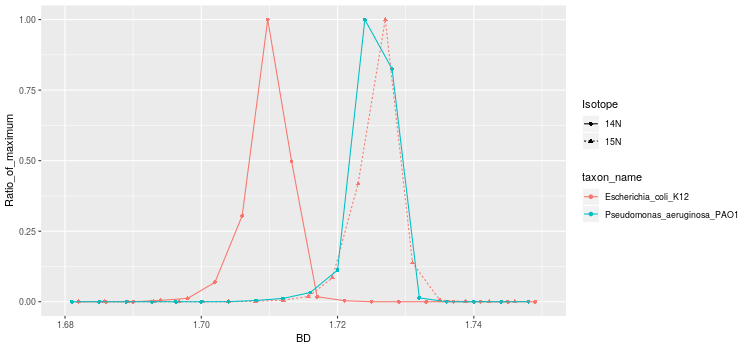

In [150]:
%%R -h 350 -w 750

SIPSim2.plot = ggplot(data=metaSIPSim.df, aes(x=BD, y=Ratio_of_maximum, color=taxon_name, 
                                              shape=Isotope, linetype=Isotope)) +
    geom_point() +
    geom_line() +
    xlim(1.68, 1.75)
SIPSim2.plot

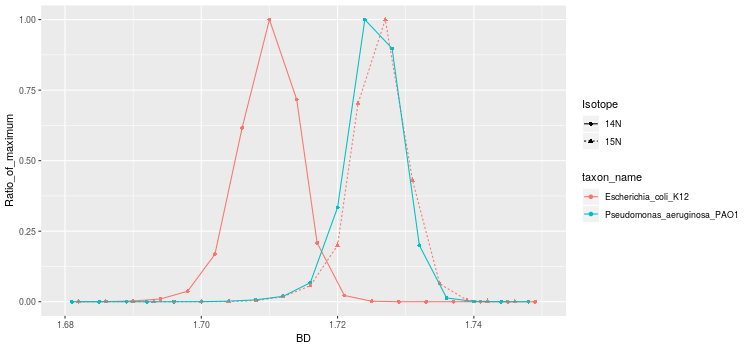

In [151]:
%%R -h 350 -w 750

SIPSim.plot = ggplot(data=SIPSim.df, aes(x=BD, y=Ratio_of_maximum, color=taxon_name,
                                         shape=Isotope, linetype=Isotope)) +
    geom_point() +
    geom_line() +
    xlim(1.68, 1.75)
SIPSim.plot

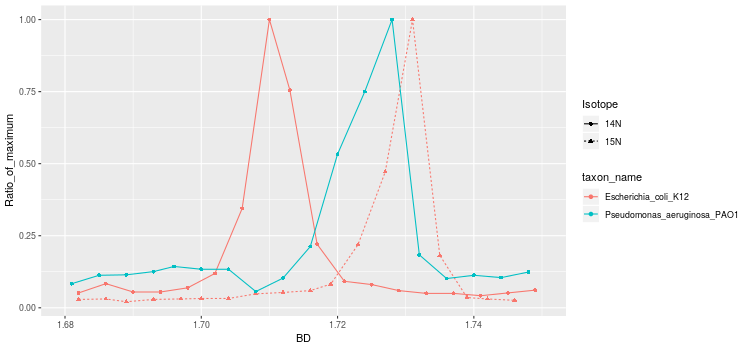

In [152]:
%%R -h 350 -w 750
real.plot = ggplot(data=real.df, aes(x=BD, y=Ratio_of_maximum, color=taxon_name, 
                                     shape=Isotope, linetype=Isotope)) +
    geom_point() +
    geom_line() +
    xlim(1.68, 1.75)

real.plot

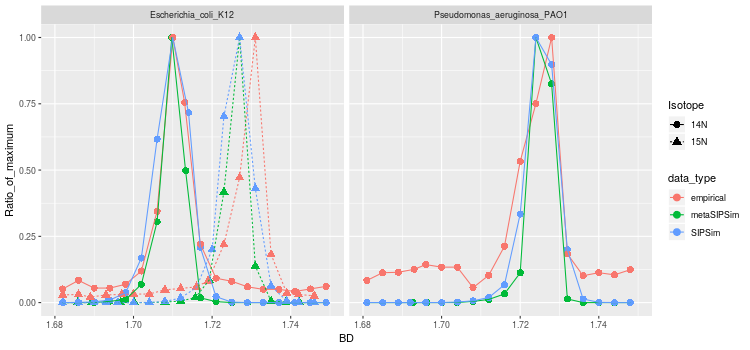

In [155]:
%%R -h 350 -w 750
full.plot = ggplot(data=full.df, aes(x=BD, y=Ratio_of_maximum, color=data_type, 
                                       shape=Isotope, linetype=Isotope)) +
    geom_point(size=3) +
    geom_line() +
    facet_grid(~taxon_name) +
    xlim(1.68, 1.75)

full.plot

### That looks pretty darn close to me!